<a href="https://www.kaggle.com/code/anirudhasutar/customer-churn-prediction-with-80-accuracy?scriptVersionId=129603179" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# importing libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #for visualization
import seaborn as sns #for visualization
from sklearn.preprocessing import MinMaxScaler #for scaling in between 0 to 1 
from sklearn.model_selection import train_test_split #to split dataset into trainig set and test set

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [2]:
dataframe=pd.read_csv(r"/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
dataframe.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
dataframe.shape

(7043, 21)

# Data preprocessing and EDA

In [4]:
dataframe.isna().sum()
#HURRAY there is no null value
#whistle podu

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df=dataframe.copy()
#as we know that customer Id has less impact on the dataset for prediction so we can remove it.
df=df.drop(columns=["customerID"])

In [6]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
#lets check is there any duplicate records or not .
df.duplicated().sum()

22

In [8]:
#dropping the duplicate records.
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(7021, 20)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null   object 


In [11]:
#totalcharges attribute should not be object type it needs to be numerical.
df.TotalCharges.values


array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [12]:
#df['TotalCharges']=df.TotalCharges.astype(float)

# the above command giving error as there is " " as a entry in a row so we should exclude that row first. 
df=df.drop(df.index[(df["TotalCharges"] == " ")],axis=0)

df['TotalCharges']=df.TotalCharges.astype(float)
df['TotalCharges'].dtype

dtype('float64')

In [13]:
#checking the unique values of all column
for col in df.columns:
    if (df[col].dtypes=='object'):
        print (f"{col}:{df[col].unique()}")

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [14]:
df.replace({'No internet service':'No'},inplace=True)
df.replace({'No phone service':'No'},inplace=True)

plotting graph to find relation among them

In [15]:
#list the all column having catagorical value
cat=[i  for i  in df.columns if len(df[i].unique())< 4]
cat

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'Churn']

In [16]:

#making a list of all the attribute without churn attribute
lis=[]
for i in df.columns:
    if i !='Churn':
        lis.append(i)

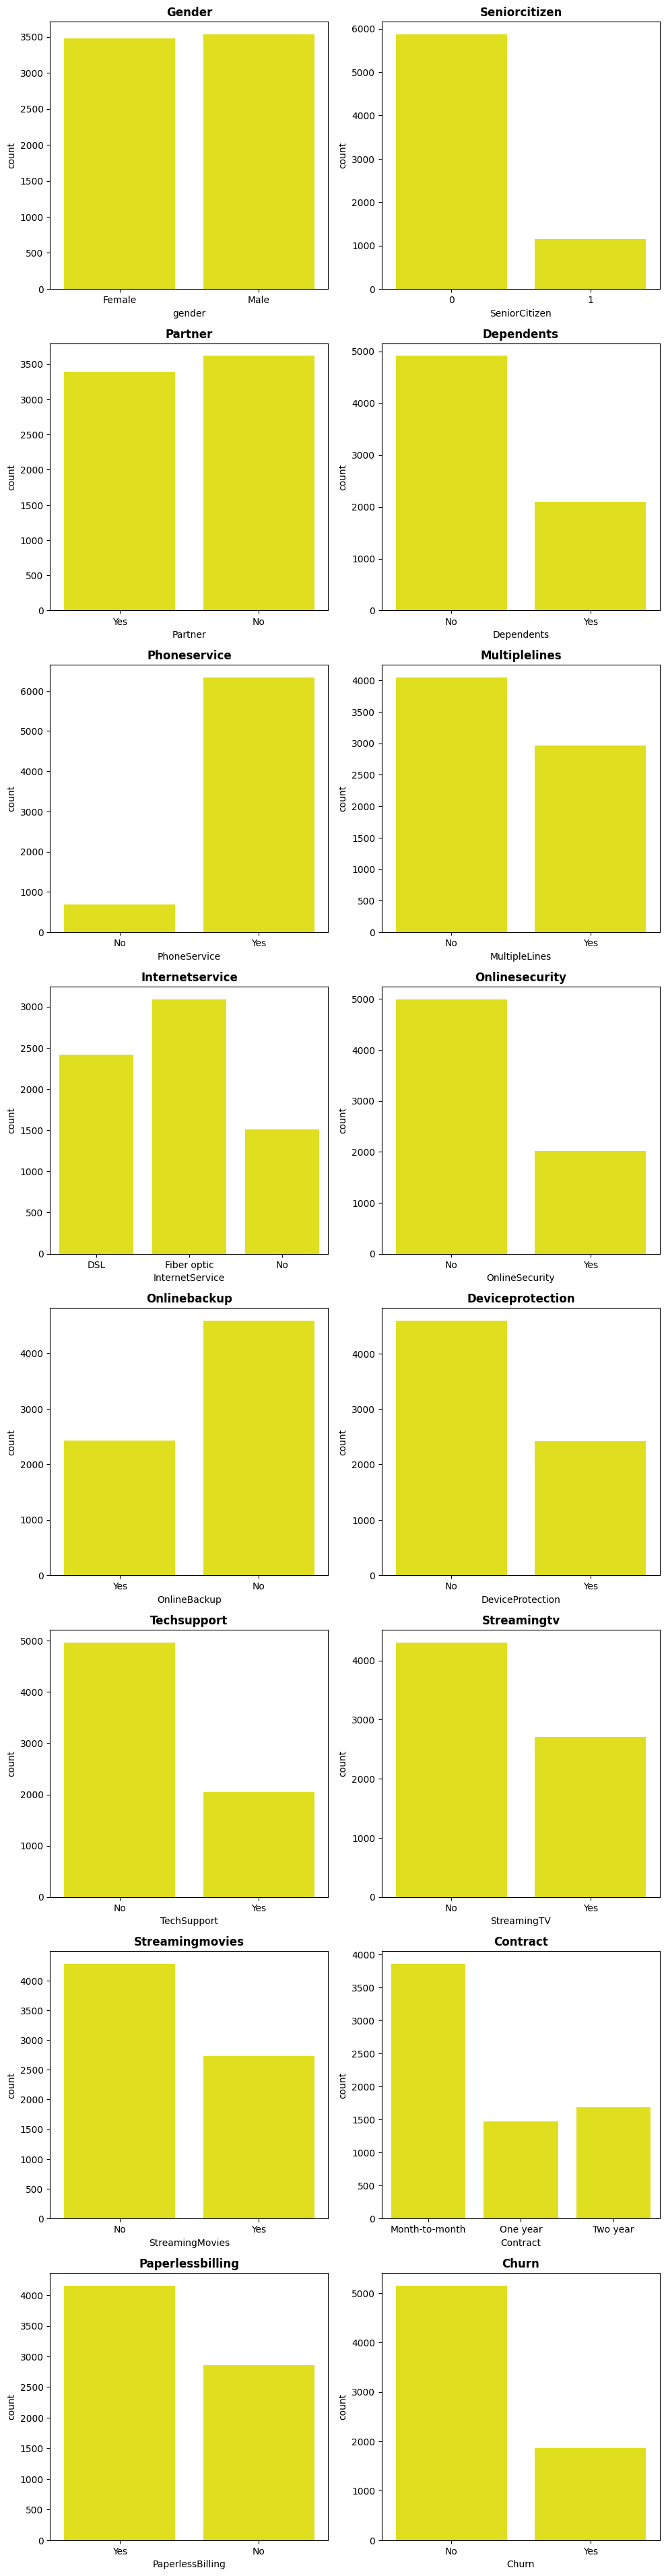

In [17]:
plt.figure(figsize=(10,100))
for n,column in enumerate(cat):
    plot=plt.subplot(21,2,n+1)
    sns.countplot(x=df[column],data=df,hue=None,saturation=0.75
                  ,color="yellow")
    plt.title(f'{column.title()}',weight='bold')
    plt.tight_layout()
plt.show()

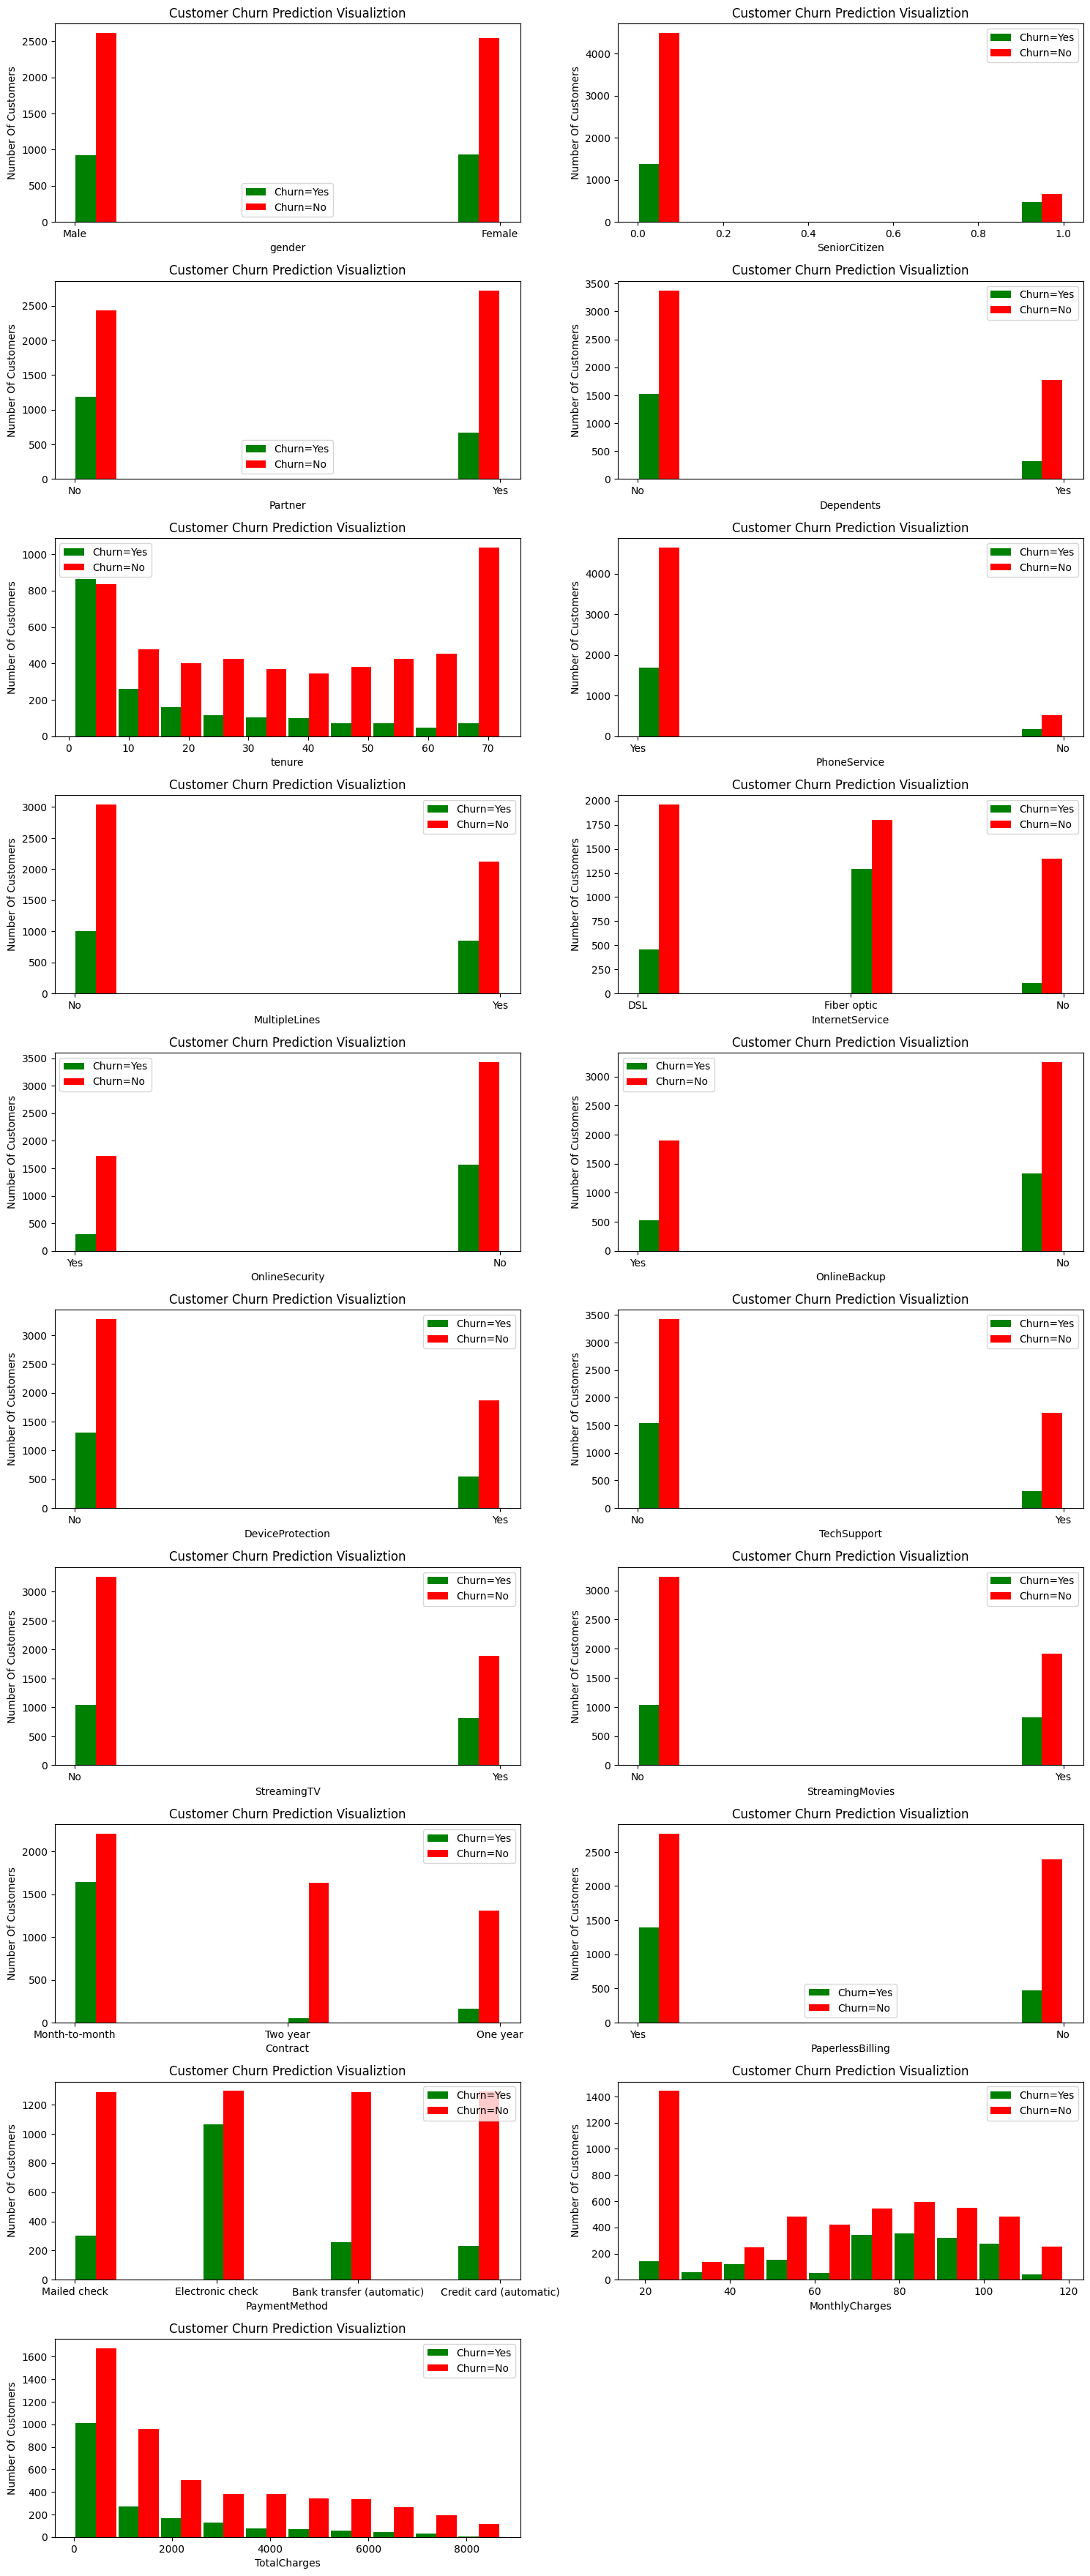

In [18]:
#lets check the relation of each attribute with the churn
plt.figure(figsize=(15,70))
for n,column in enumerate(lis):
    plot=plt.subplot(20,2,n+1)
    mc_churn_no = df[df.Churn=='No'][column]   
    mc_churn_yes = df[df.Churn=='Yes'][column]

    plt.xlabel(column)
    plt.ylabel("Number Of Customers")
    plt.title("Customer Churn Prediction Visualiztion")
    plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
    plt.tight_layout()
    plt.legend()
plt.show()


In [19]:
#lets encode the yes as 1 and 0 no as 0
#convert female into 1 and male into 0
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df[col].replace({'Yes': 1,'No': 0},inplace=True)
df['gender'].replace({'Female':1,'Male':0},inplace=True)

In [20]:
df
#as we can see there is some more columns having categorical data other than binary category so we have to handle them by using dummy variable.

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,1,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,1,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,0,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [21]:
dummy_var=["InternetService","Contract","PaymentMethod"]
df=pd.get_dummies(data=df,columns=dummy_var)

In [22]:
df.shape

(7010, 27)

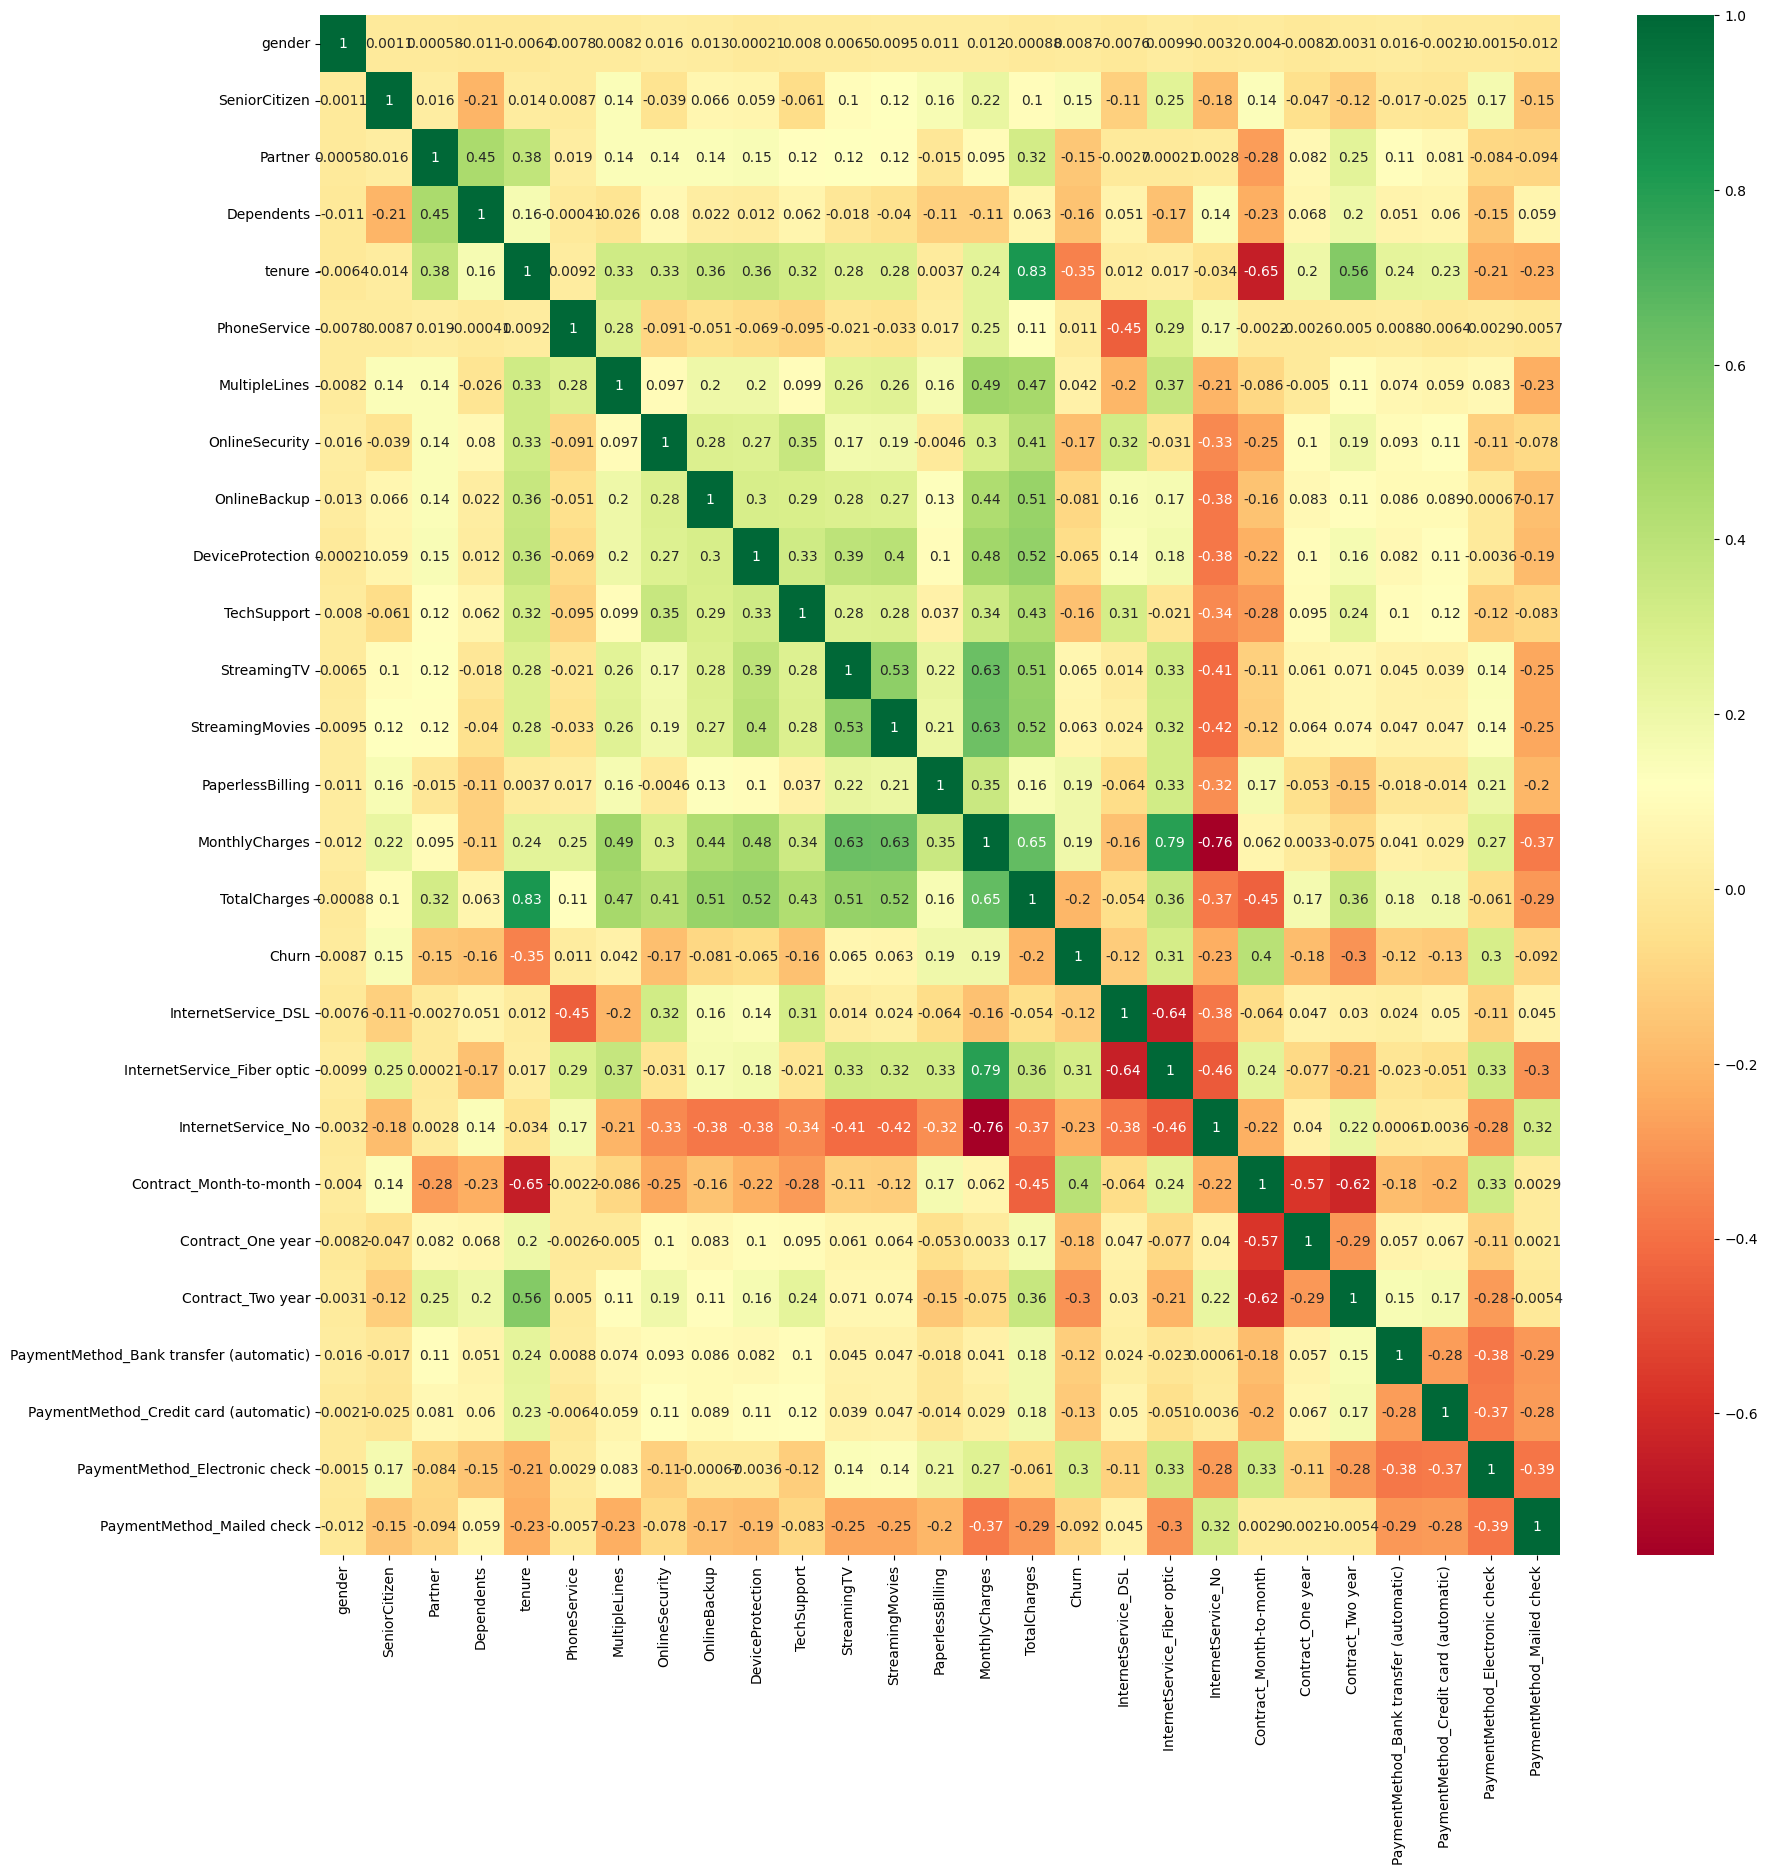

In [23]:
#we can check the corelation between the attributes by heatmap
cor=df.corr()
feature=cor.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[feature].corr(),annot=True,cmap="RdYlGn")

In [24]:
#One hot encoding for categorical columns
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,0.323944,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,1,1.000000,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,0.140845,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,0.042254,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


# **MODEL CREATION**

In [25]:
x=df.drop(["Churn"],axis=1)
y=df["Churn"]

In [26]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [27]:
#importing tensor flow for ANN
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential

In [28]:
model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [29]:
model.fit(xtrain, ytrain, epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.5403 - accuracy: 0.7124
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4351 - accuracy: 0.7919
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.8003
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4206 - accuracy: 0.8046
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4193 - accuracy: 0.8026
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4168 - accuracy: 0.8063
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4142 - accuracy: 0.8096
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4128 - accuracy: 0.8065
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4118 - accuracy: 0.8053
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4099 - accura

In [30]:
model.evaluate(xtest,ytest)

44/44 [==============================] - 0s 1ms/step - loss: 0.4387 - accuracy: 0.7889


[0.4387040436267853, 0.788873016834259]

In [31]:
yp = model.predict(xtest)
#as sigmoid function only provide the probabilities ,we have to convert it into the response i.e 1 or 0
ypred=[]
for i in yp:
    if i>=0.5:
        ypred.append(1)
    else:
        ypred.append(0)


44/44 [==============================] - 0s 1ms/step


# **CLASSIFICATION REPORT**

In [32]:
#for checking output in various aspect we are importing confusion matrix,classification report
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1047
           1       0.60      0.52      0.55       355

    accuracy                           0.79      1402
   macro avg       0.72      0.70      0.71      1402
weighted avg       0.78      0.79      0.78      1402



Text(95.72222222222221, 0.5, 'pridicted')

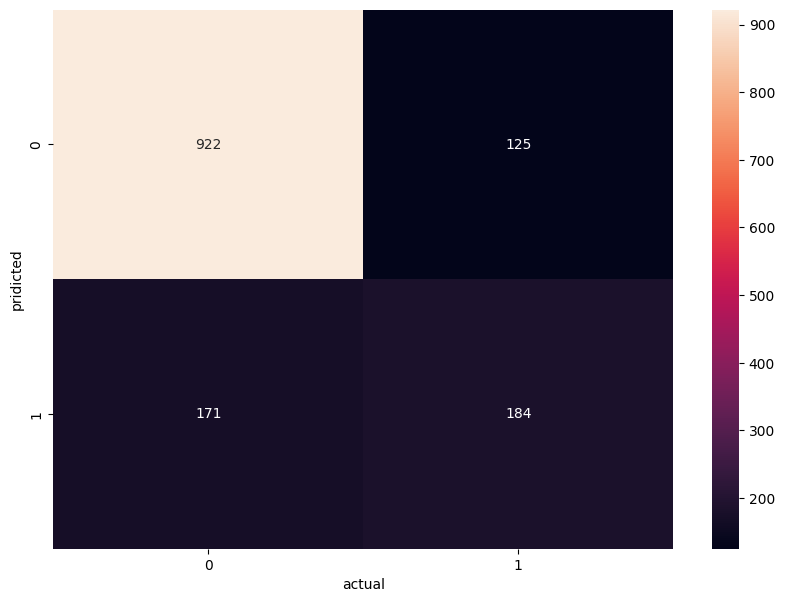

In [33]:
cm = tf.math.confusion_matrix(labels=ytest,predictions=ypred)

plt.figure(figsize = (10,7)) 
sns.heatmap(cm, annot=True, fmt='d') 
plt.xlabel('actual') 
plt.ylabel('pridicted')

In [34]:
from sklearn.metrics import accuracy_score
round(accuracy_score(ytest,ypred),2)

0.79

In [35]:
print('precision')
p=round(955/(955+192),2)
print(p)

precision
0.83


In [36]:
print("accuracy")
a=round((955+163)/(955+163+192+92),2)
print(a)

accuracy
0.8


In [37]:
print("sensitivity")
r1=round((955)/(955+92),2)
print(r1)

sensitivity
0.91


In [38]:
print("specificity")
r0=round((163)/(163+192),2)
print(r0)

specificity
0.46


In [39]:
print("f1_score")
f=2*((p*r1)/(p+r1))
print(round(f,2))

f1_score
0.87
